# Diabetes Prediction Model
<div style="text-align:justify;">

## Introduction
Diabetes is a chronic disease that occurs when the pancreas does not produce adequate insulin or when the body is unable to effectively use the insulin produced. 
## Business Understanding
According to the World Health Organization, there was a 3% increase in age standardized mortality rates from diabetes between 2000 and 2019. In lower income countries it increased to 13%. There are two types of diabetes: type 1 diabetes and type 2 diabetes. Type 1 diabetes is also known as insulin-dependent and is characterized by deficient insulin production by the body. Patients suffering from this require daily administration of insulin. Type 2 diabetes affects the body's use of insulin and leads to high levels of blood sugar. Factors affecting type 2 diabetes include: overweight, genetics, lack of exercise. Keeping a healthy lifestyle is a key component in keeping diabetes away.
### Business Problem
There are certain health indicators that could assist someone in knowing how susceptible they are to suffering from diabetes. Genetics play a role as well as other factors such as lifestyle which includes eating habits, smoking, and exercise. Early intervention is key and would help give preventive care to individuals at high risk and ultimately reduce the number of deaths from diabetes.
### Stakeholders
#### Patients
This includes individuals potentially at risk of suffering from diabetes. This model would help them be aware of their situation and take the necessary steps to address it i.e improve their lifestyle, quit smoking e.t.c
#### Healthcare Providers
Hospitals, clinics, personal doctors fall under this category. Early detection of diabetes goes a long way in managing the disease and healthcare providers can develop the right treatment plan for individuals suffering from the disease.  Through this prediction model patients are able to receive personalized treatment plans.
### Health Insurance Companies 
By identifying populations at high risk of suffering diabetes, insurance companies are able to come up with the right coverage and support for diabetes management particularly in lower income areas.
### Objective
The primary goal is to create a diabetes prediction model that can be used to predict the individuals at risk of suffering from diabetes. By doing this, individuals are able to get early preventive care to reduce the impact of diabetes.
## Data Understanding
The dataset used in this project is sourced from here: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data. It contains 100,000 rows and 9 columns. The 9 columns are:
- Gender
- Age
- Hypertension
- Heart disease
- Smoking history
- BMI
- HbA1c- level (average blood sugar level over the last 2-3 months)
- Blood Glucose level
- Diabetes

All these features play a role in determining the risk of an individual suffering from diabetes. Based on this dataset we will be able to conclude whether an individual is at risk of getting diabetes or not.

In [250]:
# Check dataset size
import pandas as pd

diabetes_df = pd.read_csv("Data/diabetes_prediction_dataset.csv")
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [251]:
# check the shape of the dataset
diabetes_df.shape

(100000, 9)

In [252]:
# Basic description of the dataset
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


The dataset has 100,000 rows and 9 columns with the target column being diabetes where 0 means they do not have diabetes and 1 meaning the individual has diabetes. 

In [253]:
# a basic summary of the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Data Preparation
Before performing exploratory analysis and modelling on the data certain issues such as missing values and duplicates have to be handled first.

In [254]:
# check for missing values
diabetes_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

The dataset does not have missing values. Let's check for possible duplicates next.

In [255]:
# check for duplicates
diabetes_df.duplicated().sum()

3854

There are 3854 duplicated rows. This should be addressed before going further.

In [256]:
# Drop duplicates
diabetes_df = diabetes_df.drop_duplicates().copy()

diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


After dropping the duplicate rows we are left with 96146 that we will use for analysis.

In [257]:
# check the balance of gender in the dataset
diabetes_df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

We are interested in male and female gender so we can remove the "other" category that has very few entries.

In [258]:
# Remove rows where the gender value is other
diabetes_df = diabetes_df.loc[diabetes_df['gender'] != 'Other']

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


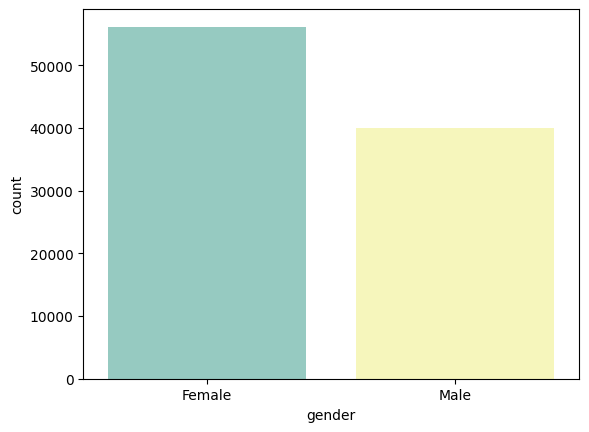

In [259]:
# check the distribution of male and female in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x='gender',data=diabetes_df,palette='Set3')
plt.xticks(ticks=[0, 1])
plt.show()

From the visual, it is evident that there are more females than males present in the dataset but it is not heavily imbalanced.

c:\Users\jeffr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


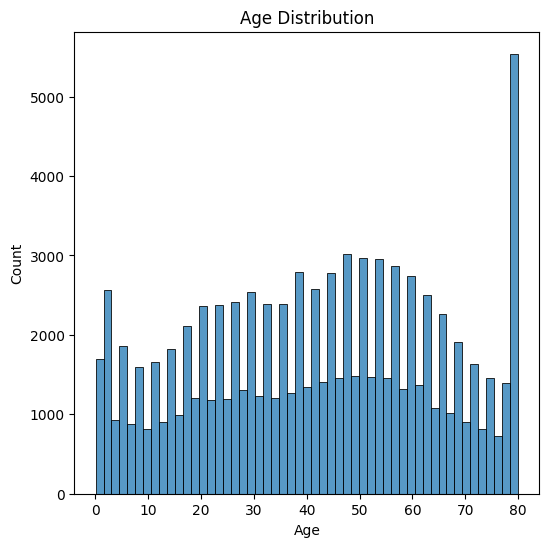

In [260]:
plt.figure(figsize=(6, 6))
sns.histplot(diabetes_df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The gender and smoking history columns are categorical in nature. We use one-hot encoding to incorporate categorical variables into our model.

In [261]:
diabetes_df['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [262]:
diabetes_df['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

In [263]:
# carry out one hot encoding on categorical columns
from sklearn.preprocessing import OneHotEncoder
categorical_columns = diabetes_df.select_dtypes(include=['object']).columns.tolist()

# Initialize the Encoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one hot encoding on the categorical columns
one_hot_encoded = encoder.fit_transform(diabetes_df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
# Use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

one_hot_df.index = diabetes_df.index  # Ensure the indexes match

# Concatenate the two data frames together
diabetes_encoded = pd.concat([diabetes_df, one_hot_df], axis=1)

# Drop the original categorical columns
diabetes_encoded.drop(categorical_columns, axis=1, inplace=True)


In [264]:
diabetes_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96128 non-null  float64
 1   hypertension                 96128 non-null  int64  
 2   heart_disease                96128 non-null  int64  
 3   bmi                          96128 non-null  float64
 4   HbA1c_level                  96128 non-null  float64
 5   blood_glucose_level          96128 non-null  int64  
 6   diabetes                     96128 non-null  int64  
 7   gender_Female                96128 non-null  float64
 8   gender_Male                  96128 non-null  float64
 9   smoking_history_No Info      96128 non-null  float64
 10  smoking_history_current      96128 non-null  float64
 11  smoking_history_ever         96128 non-null  float64
 12  smoking_history_former       96128 non-null  float64
 13  smoking_history_never

After performing one hot encoding we see that some new columns are formed which will make modelling easier.

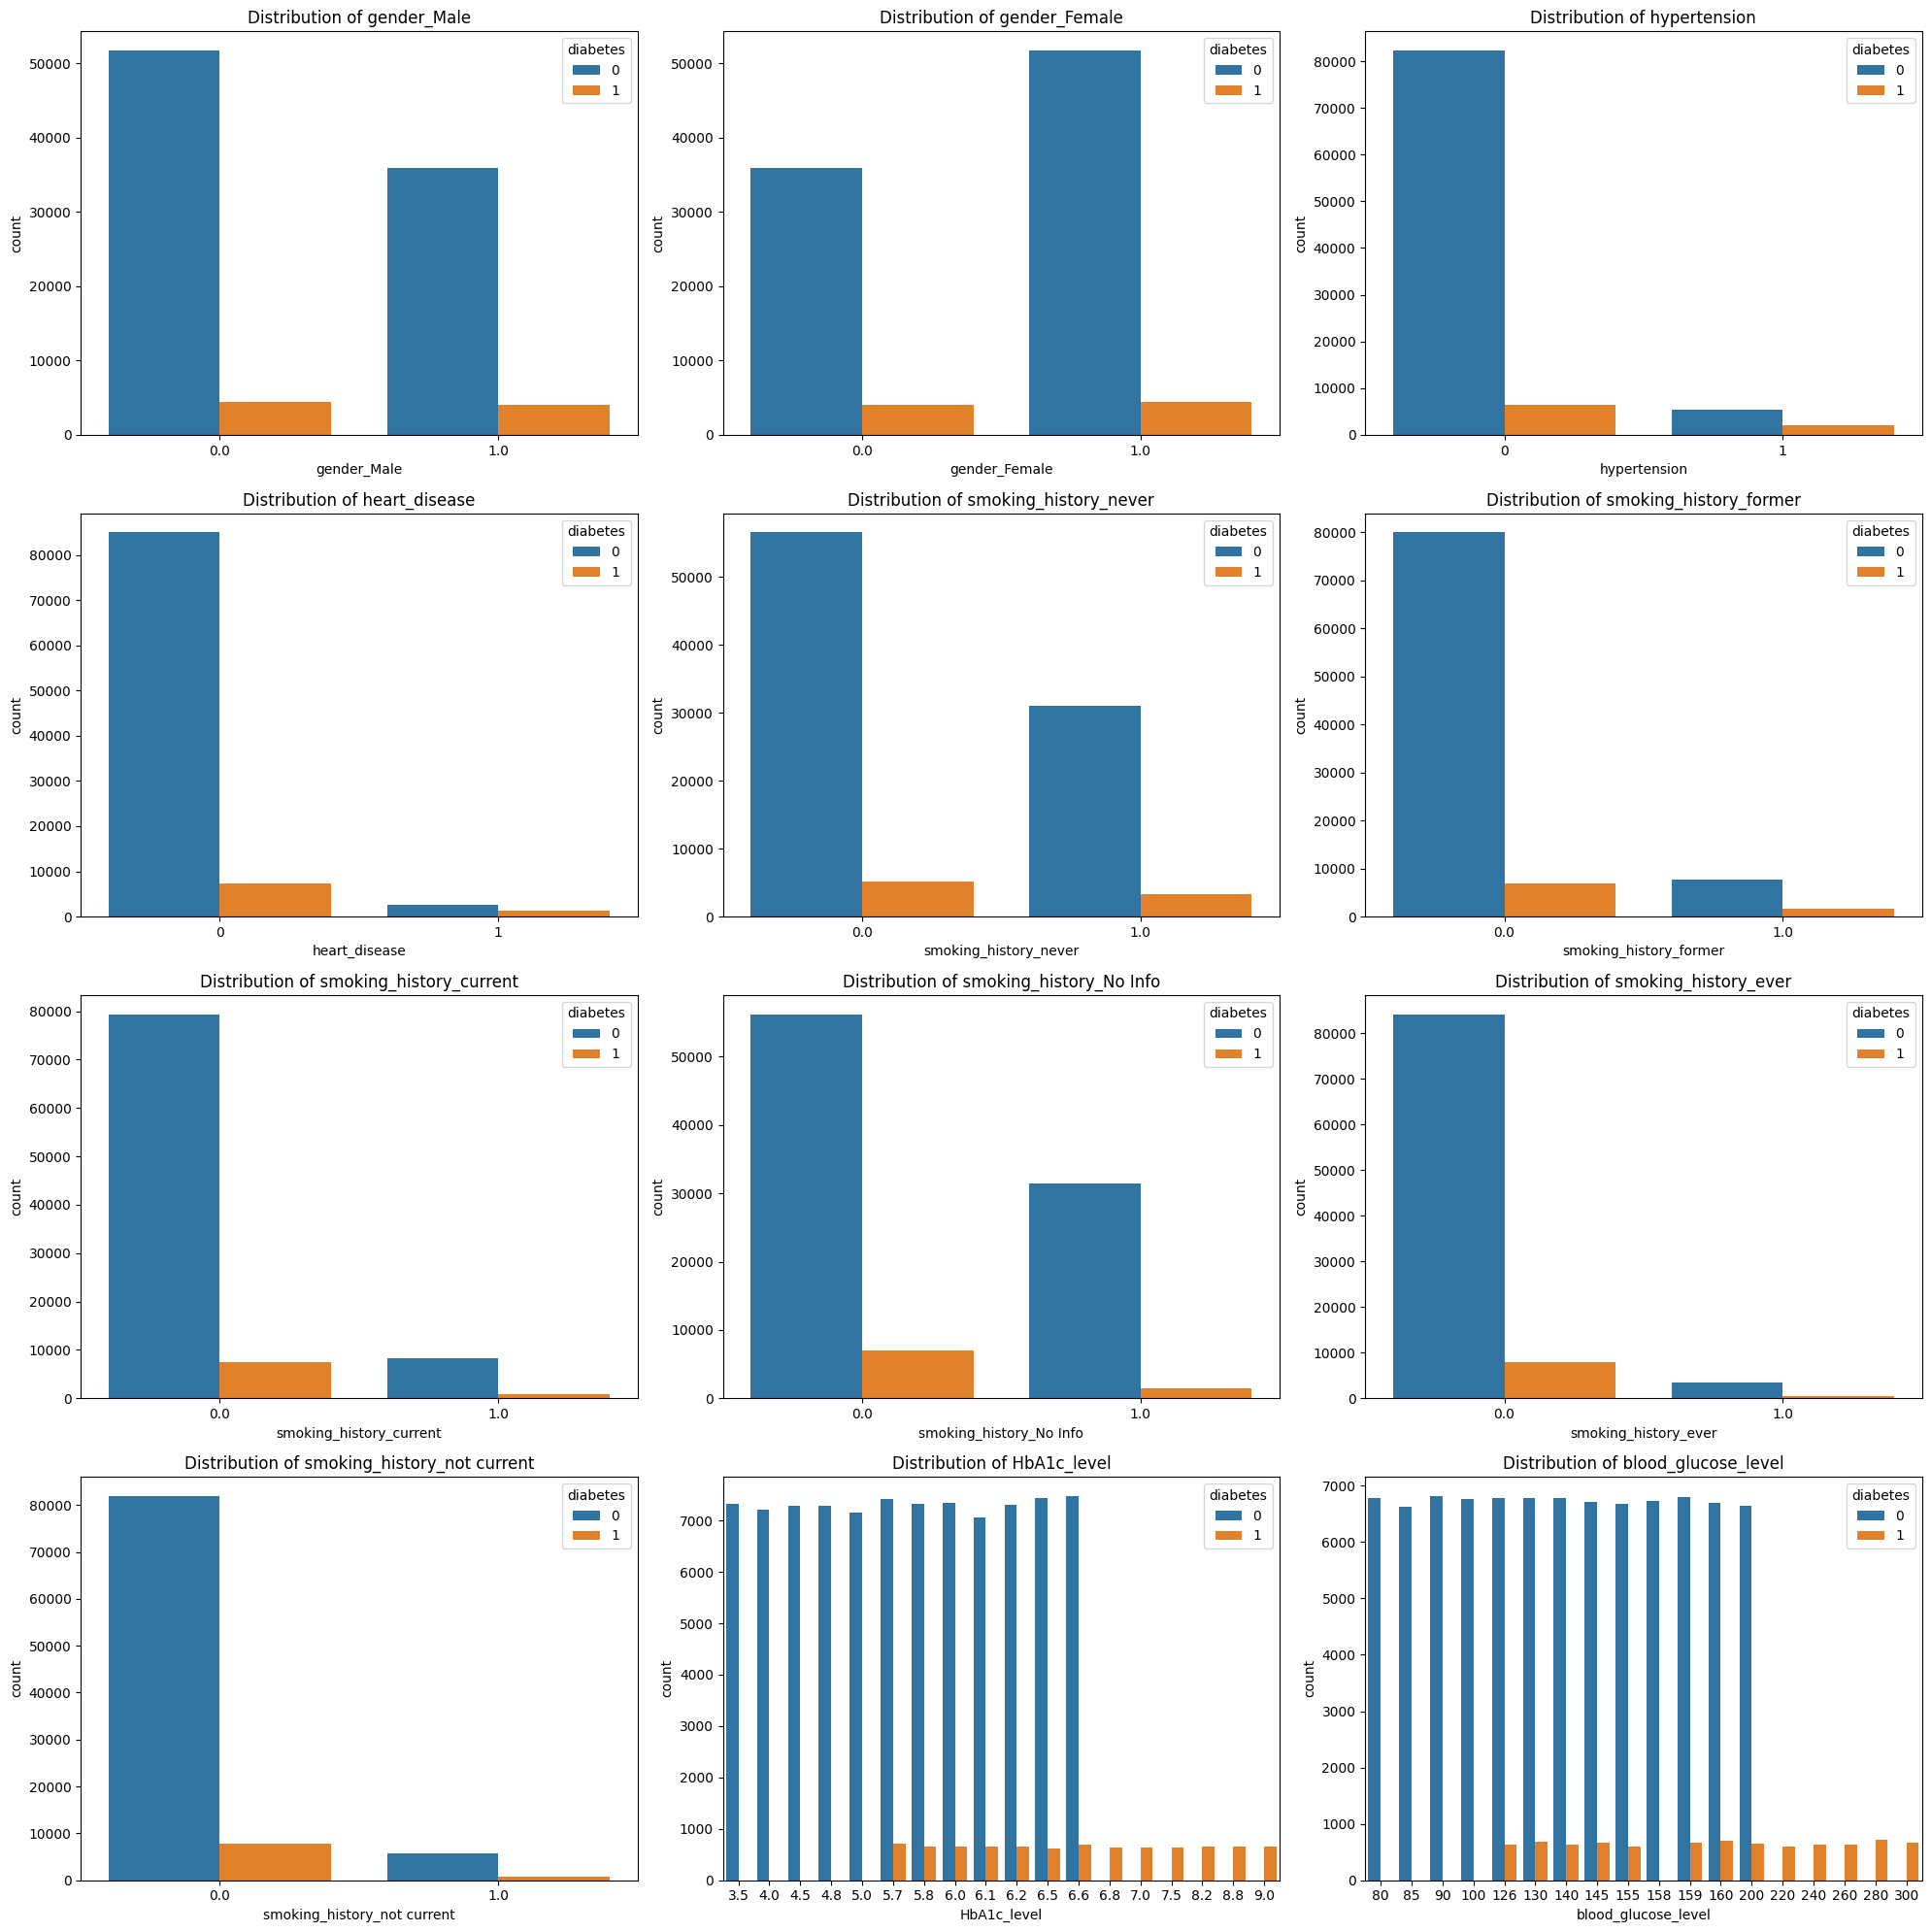

In [265]:


# put some of the columns in a list for plotting
encoded_vars = ['gender_Male', 'gender_Female', 'hypertension', 
                'heart_disease', 'smoking_history_never', 
                'smoking_history_former', 'smoking_history_current','smoking_history_No Info',
                'smoking_history_ever', 'smoking_history_not current', 'HbA1c_level', 'blood_glucose_level',
                ]

# Define number of rows and columns for subplots
nrows = 4
ncols = 3

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(encoded_vars[:nrows * ncols]):  # limiting to the number of subplots available
    ax = axs[i]
    sns.countplot(x=var, data=diabetes_encoded, hue='diabetes', ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Based on the plots made above, we see that the HbA1c_level and blood_glucose_level may have a relationship with probability of getting diabetes, individuals with higher blood glucose levels suffer from diabetes.

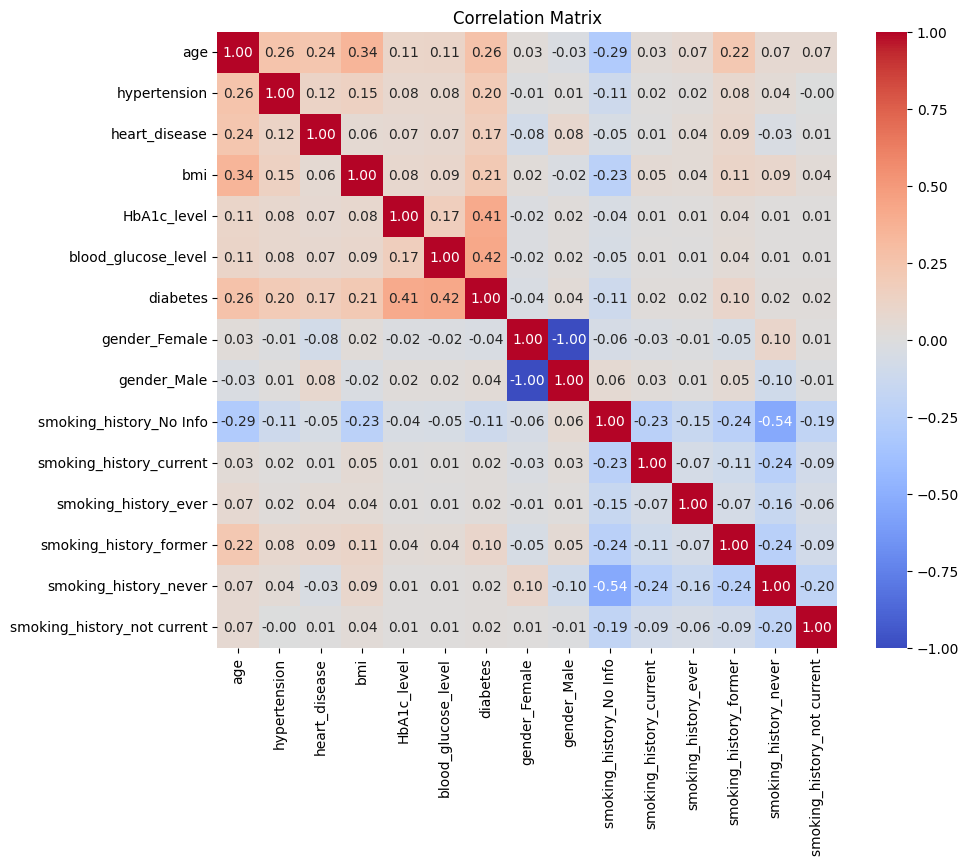

In [266]:
# plot a correlation matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation backs up the plots from before with HbA1c_level and blood_glucose_level having the highest positive correlation with the diabetes target variable. Age also has a reasonably strong positive correlation with diabetes.

## Feature Selection
In this section the dataset is split into training and test sets. The test set is used for evaluation of the model based on the modelling done on the training set.

In [267]:
# use train test split to split the dataset
from sklearn.model_selection import train_test_split
X = diabetes_encoded.drop('diabetes', axis=1)
y = diabetes_encoded['diabetes']

# use 20% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the values in the dataset is important to standardize the range of independent features in the dataset.

In [268]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale and fit the train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modelling
Under modelling three models will be created. The first one is a baseline model that is a simple logistic regression model, the second one is a decision tree without optimal hyper parameters and the third one is a decision tree using optimal hyper parameters after using Grid Search CV.

In [269]:
# Use logistic regression as the baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score,recall_score

# Initialize and train the model
first_model = LogisticRegression(random_state=42)
first_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = first_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.86      0.62      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.80      0.85     19226
weighted avg       0.95      0.96      0.95     19226

Accuracy: 0.9572453968584209


A basic logistic regression model is used as the original baseline model. The accuracy of 0.96 is high but maybe misleading because our target variable is imbalanced. Precision and recall are better metrics to use in this scenario and we can see that the precision is high while the recall is low.

In [270]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
second_model = DecisionTreeClassifier(random_state=42)
second_model.fit(X_train, y_train)

# Make predictions
y_pred = second_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17525
           1       0.69      0.72      0.71      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.85      0.84     19226
weighted avg       0.95      0.95      0.95     19226

Accuracy: 0.9473629460106107


Our second model uses a decision tree which may be better because our dataset is quite large. The accuracy has reduced slightly while the precision has gone down considerably. The recall however, has improved.

In [271]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dtree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

We use Grid Search CV to find the optimal combination of parameters to use for our decision Tree classifier.

In [272]:

# Initialize the model with the best parameters
final_model = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    criterion=best_params['criterion'],
    max_features=best_params['max_features'],
    random_state=42
)

# Train the model on the full training data
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model using a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.99      0.66      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



The accuracy has improved to 0.97 the recall has largely remained the same and the precision has gone up to 0.99.

## Evaluation metrics
The metrics used to evaluate the model are:
- Accuracy
- F1-score
- Precision
- Recall

The final model will be the one used for evaluation.

### Confusion Matrix
The confusion matrix is a table that summarizes the predictions against the actual outcomes. This will give us an indication of how well the model does at predicting who is actually suffering from diabetes.

In [273]:
# use test set for predictions
y_pred_test = final_model.predict(X_test)

Confusion Matrix:
 [[17508    17]
 [  571  1130]]


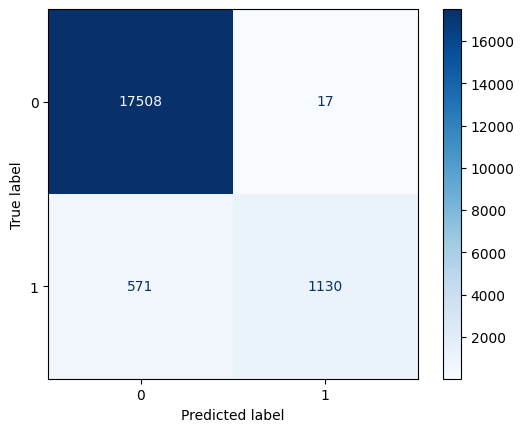

In [274]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:\n', conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Based on the confusion matrix:
The TP (True Positives) are 1130. This means that 1130 individuals were correctly predicted to have diabetes.
The TN (True Negatives) are 17508. This means that 17508 individuals were correctly predicted to not having diabetes.
The FN (False Negatives) are 571. This means that 571 individuals actually had diabetes but were predicted not to.
The FP (False Positives) are 17. This means that 17 individuals were wrongly predicted to having diabetes but they did not actually have it.

In [275]:
# accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("The accuracy is: ", accuracy)
# precision
precision = precision_score(y_test, y_pred_test)
print("The Precision is: ", precision)
# recall
recall = recall_score(y_test, y_pred_test)
print("The Recall is: ", recall)
# f1_score
f1 = f1_score(y_test, y_pred_test)
print("The f1-score is: ", f1)


The accuracy is:  0.9694164152709872
The Precision is:  0.985178727114211
The Recall is:  0.6643151087595532
The f1-score is:  0.7935393258426967


### ROC curve and AUC
There is huge class imbalance in our target variable which means that the model gets a high accuracy because it is able to predict many instances of the majority class. An ROC curve would give us a better picture of the performance of the model. The ROC curve shows the true positive rate against the false positive rate of our model. Ideally the model with a ROC curve furthest top left has the best performance because the AUC is close to 1 which is a perfect model while 0.5 value for AUC means it is random guesses.

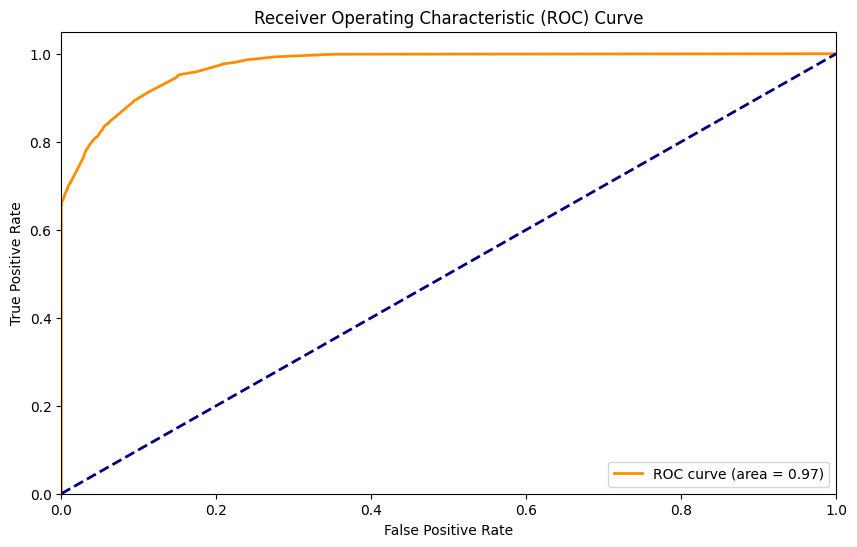

In [276]:
# import roc curve and auc
from sklearn.metrics import roc_curve, auc

# probability scores for each point in test set
y_prob = final_model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
# calculate false positive, true positive and threshold for the test set
false_pr, true_pr, thresholds = roc_curve(y_test,y_prob)

roc_auc = auc(false_pr, true_pr)
plt.figure(figsize=(10, 6))
plt.plot(false_pr, true_pr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The AUC is 0.97 which shows that the model has an excellent ability of distinguishing between positive and negative cases. It has a high true positive rate and a very low false positive rate.

## Results and recommendations
From the results of the analysis we can see the following:
- The model shows a high level of performance with a 96% accuracy which means it correctly predicts individuals with diabetes.
- The AUC of 0.97 shows that the model has a great ability of distinguishing between the positive and negative cases.
- A f1-score of 0.79 shows that there is a decent balance between precision and recall from the model.
- 66% recall does indicate that there could be further improvement in fine tuning the model.
- 98% precision shows that the model can predict a lot of positive cases.

Health care providers can use the model for early detection and develop personalized treatment plans for individuals suffering from diabetes.
Health insurance companies can use the model to take note of high risk areas especially in lower income areas and adjust their health coverage accordingly.

### Recommendations
From the analysis the following recommendations can be drawn:
- Ensemble models can be used to improve the performance.
- Different data with new features i.e pregnancy can be used to further fine tune the model.